In [20]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

# Hyperparamete

In [14]:
N = 1000
size = 40
TOL = 1e-6
Total_loss = []

# Create Data

In [15]:
def create_data(size):
    A_matrix = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            if i == j:
                A_matrix[i][j] = 2*(i+1)
            if j == (i+1) or j == (i-1):
                A_matrix[i][j] = -1
  
    B_vector = np.array([1.5*i-6 for i in range(size)])
                
    return A_matrix,B_vector

In [19]:
create_data(size)[0]

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [-1.,  4., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0., -1.,  6., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0., -1.,  8., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0., -1., 10., -1.,  0.,  0.,  0.,  0.,  0.,  0., 

In [4]:
def escape(old_x,new_x,TOL):
    if np.max(np.abs(old_x - new_x)) < TOL:
        return True,np.max(np.abs(old_x - new_x))
    return False,np.max(np.abs(old_x - new_x))

In [5]:
def draw(loss,title=None):
    
    ite = [i for i in range(1,len(loss)+1,1)]
    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111)
    if title is not None:
        ax.set_title(title)
    ax.xaxis.set_major_locator(MultipleLocator(1))
#     ax.yaxis.set_major_locator(MultipleLocator(0.1))

    ax.plot(ite,loss,lw = 1,label = title)
        
    ax.grid(linestyle="--",linewidth = 0.5,zorder = 0)#pair0
    ax.legend()

## Test Data

In [6]:
Test_matrix = np.array(
    [
    [4,3,0],
    [3,4,-1],
    [0,-1,4]]
)
tb_matrix = np.array(
    [24,30,-24]
)

# Conjugate Gradient Method

In [7]:
def CGM(A_matrix,B_matrix,test=False): 
    
    init_x = np.ones_like(B_matrix,dtype="float64")
    init_r = B_matrix - np.dot(A_matrix,init_x)
    loss = []
    alpha  = np.dot(init_r,init_r)
    init_v = copy.deepcopy(init_r)
    
    k = 1
    while(k<=N):
        if test:
            print(init_x)
        
        u = np.dot(A_matrix,init_v)
        t = alpha/np.dot(init_v,u)
        
        x = init_x + np.dot(t,init_v)
        
        r = init_r - np.dot(t,u)
        
        beta = np.dot(r,r)
        
        esp = escape(init_x,x,TOL)[0]
        loss.append(escape(init_x,x,TOL)[1])
        init_x = x
        init_r = r
        
        if esp:
            break
            
        s = beta/alpha
        v = r + np.dot(s,init_v)
        init_v = v
        init_r = r
        init_x = x
        alpha = beta
        k+=1
        
    return x,loss,k

1000
40
[-4.20772031 -2.41544062 -0.95404213 -0.30881238 -0.01645607  0.14424948
  0.24745445  0.32010534  0.37423927  0.41619675  0.44969339  0.47706461
  0.49985357  0.51912439  0.53563548  0.54994049  0.56245387  0.57349315
  0.58330472  0.59208224  0.59998105  0.60712733  0.61362365  0.61955446
  0.62499081  0.62999237  0.63460889  0.63888311  0.64285227  0.64654758
  0.64999615  0.65322266  0.65624708  0.65908839  0.66176245  0.66428371
  0.66666486  0.66891589  0.67094298  0.66463679]
30


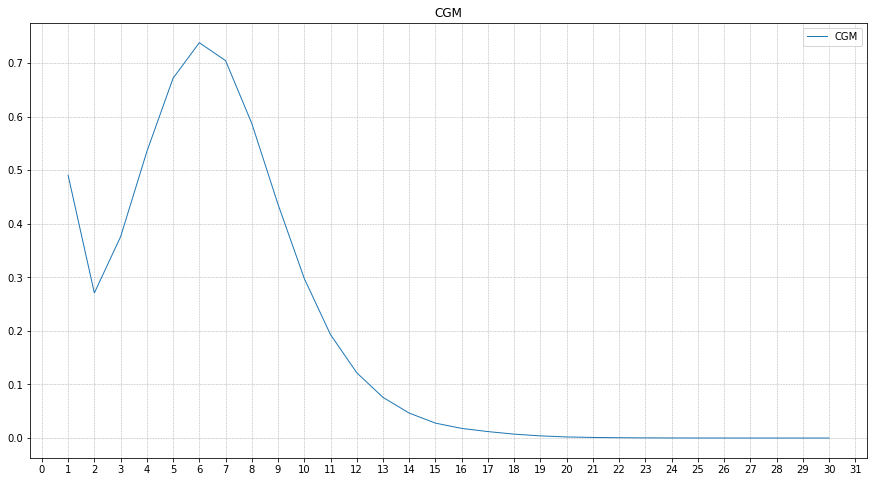

In [8]:
x,loss,k = CGM(create_data(size)[0],create_data(size)[1],test=False)
Total_loss.append([loss,'CGM'])
print(N)
print(size)
print(x)
print(k)
draw(loss,'CGM')

In [9]:
def SOR(A_matrix,B_matrix,w = 1,test=False):
    k = 1
    n = A_matrix.shape[0]
    loss = []
    init_x = np.ones_like(B_matrix,dtype="float64")
    x = copy.deepcopy(init_x)
    
    while(k<N):
        x_p = copy.deepcopy(x)
        if test:
            print(x)
        for i in range(n):
            summ = 0.0
            for j in range(n):
                if j==i:
                    continue
                summ += A_matrix[i][j] * x[j]
                
            x[i] = w*(-summ + B_matrix[i])/A_matrix[i][i]

            x[i] +=(1-w)*x_p[i]
        esp = escape(x_p,x,TOL)[0]
        
        loss.append(escape(x_p,x,TOL)[1])
        if esp:
            break
        k+=1
    return x,loss,k

1000
40
[-4.2077202  -2.41544058 -0.95404215 -0.3088123  -0.01645625  0.14424981
  0.24745397  0.32010581  0.37423902  0.41619664  0.44969369  0.47706446
  0.49985343  0.5191246   0.5356355   0.54994029  0.56245393  0.57349329
  0.58330462  0.59208214  0.59998118  0.60712738  0.61362352  0.61955447
  0.62499094  0.6299923   0.63460881  0.63888323  0.64285225  0.64654748
  0.64999629  0.65322255  0.65624714  0.65908838  0.66176246  0.66428371
  0.66666486  0.66891589  0.67094298  0.66463679]
11


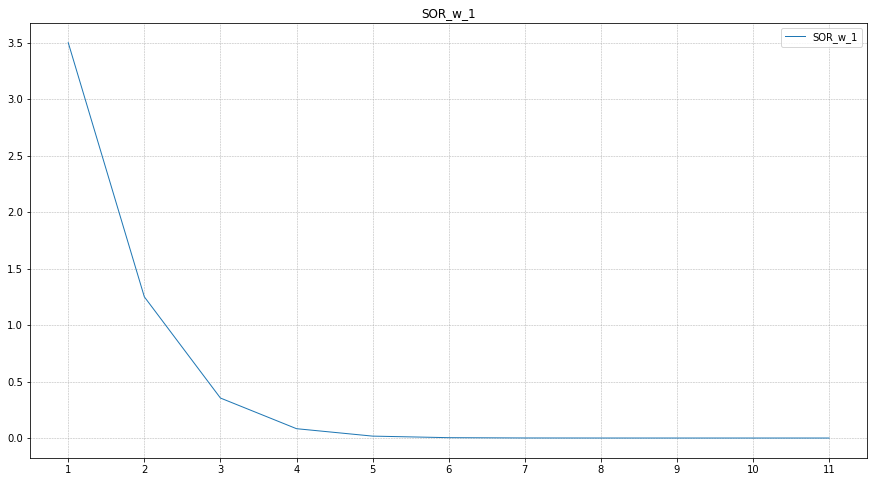

In [10]:
x,loss,k = SOR(create_data(size)[0],create_data(size)[1],w = 1)
Total_loss.append([loss,'SOR_w_1'])
print(N)
print(size)
print(x)
print(k)
draw(loss,'SOR_w_1')

1000
40
[-4.20772019 -2.41544029 -0.95404196 -0.30881236 -0.01645632  0.14424979
  0.24745397  0.32010583  0.37423903  0.41619662  0.44969368  0.47706448
  0.49985344  0.5191246   0.53563548  0.54994027  0.56245391  0.57349327
  0.58330459  0.59208212  0.59998115  0.60712735  0.61362349  0.61955444
  0.62499091  0.62999228  0.63460878  0.63888321  0.64285223  0.64654745
  0.64999626  0.65322253  0.65624711  0.65908835  0.66176243  0.66428368
  0.66666484  0.66891584  0.67094299  0.66463672]
55


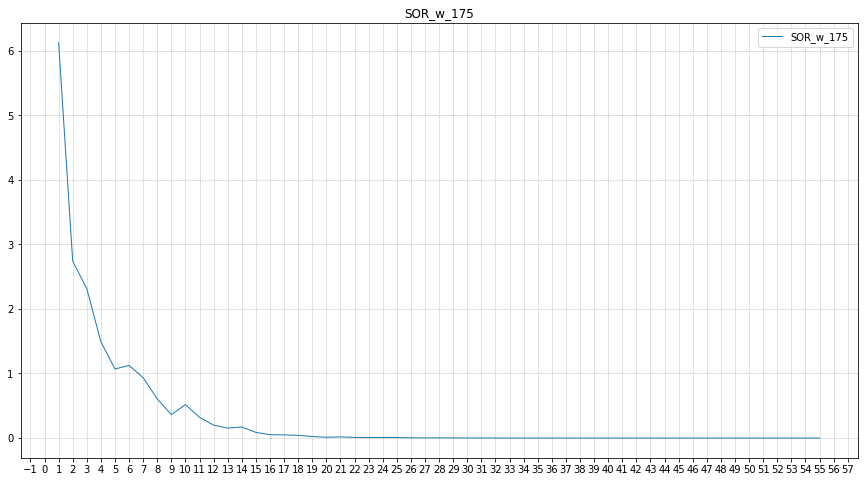

In [11]:
x,loss,k = SOR(create_data(size)[0],create_data(size)[1],w = 1.75)
Total_loss.append([loss,'SOR_w_175'])
print(N)
print(size)
print(x)
print(k)
draw(loss,'SOR_w_175')

1000
40
[-4.20771881 -2.41543959 -0.95404177 -0.3088122  -0.01645623  0.14424981
  0.24745397  0.32010581  0.37423902  0.41619664  0.44969369  0.47706446
  0.49985343  0.5191246   0.5356355   0.54994029  0.56245393  0.57349329
  0.58330462  0.59208214  0.59998118  0.60712738  0.61362352  0.61955447
  0.62499094  0.6299923   0.63460881  0.63888323  0.64285225  0.64654748
  0.64999629  0.65322255  0.65624714  0.65908838  0.66176246  0.66428371
  0.66666486  0.66891589  0.67094298  0.66463679]
38


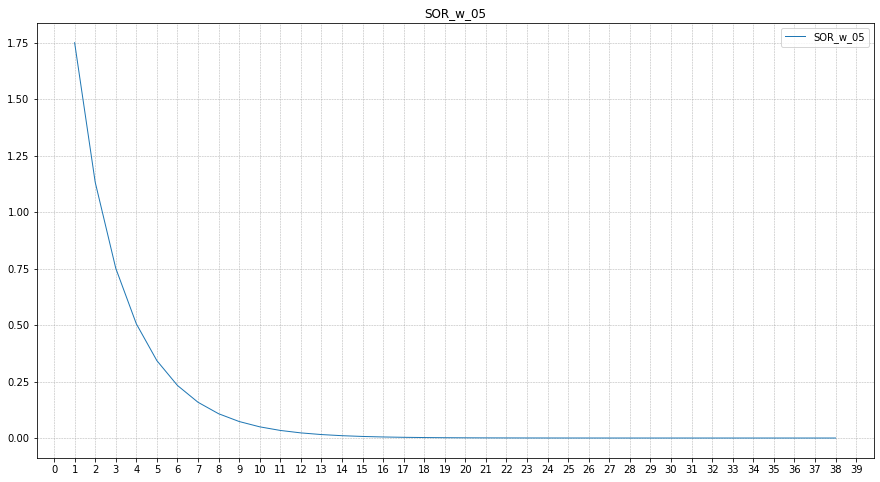

In [12]:
x,loss,k = SOR(create_data(size)[0],create_data(size)[1],w = 0.5)
Total_loss.append([loss,'SOR_w_05'])
print(N)
print(size)
print(x)
print(k)
draw(loss,'SOR_w_05')

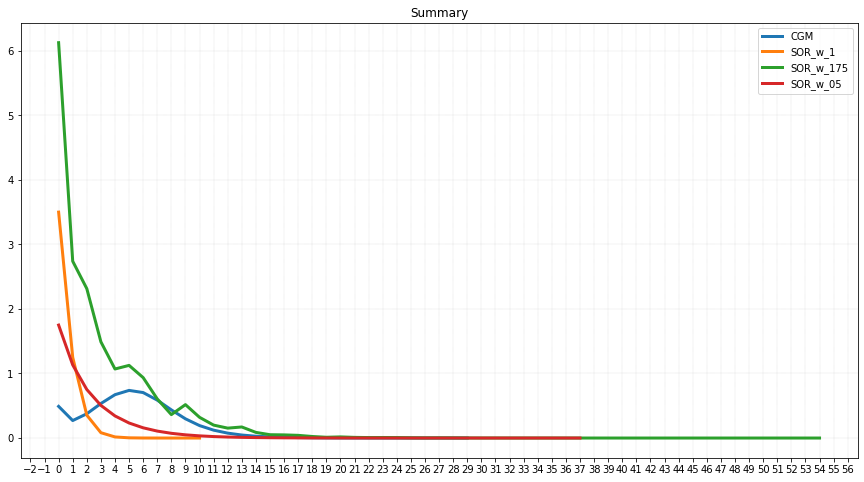

In [13]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
ax.set_title('Summary')
ax.xaxis.set_major_locator(MultipleLocator(1))
for loss,name in Total_loss:
    ax.plot(loss,lw = 3,label = name)
ax.grid(linestyle="--",linewidth = 0.2,zorder = 0)#pair0
ax.legend()